# **House Price Prediction Project**

This project aims to predict house prices based on various features from the California Housing dataset. The workflow includes data exploration, preprocessing, training an XGBoost regression model, evaluating its performance, and using it for predictions.

**Overview of the Process**

1.	Importing Dependencies:
 * Essential libraries such as NumPy, pandas, Matplotlib, Seaborn, and Scikit-learn are imported.
 * The XGBRegressor model from the XGBoost library is used for regression.
2.	Data Collection and Analysis:
 * The California Housing dataset is fetched using fetch_california_housing().
 * The dataset's description and structure are examined.
3.	Exploratory Data Analysis (EDA):
 * Histograms are plotted to visualize the distribution of features.
 * A correlation heatmap is constructed to understand relationships between features.
4.	Data Preprocessing:
 * Features (X) and target variable (Y) are separated.
 * Data standardization is performed using StandardScaler to normalize the feature values.
5.	Model Training:
 * The dataset is split into training and testing sets.
 * An XGBoost regressor (XGBRegressor) is instantiated and trained on the training data.
6.	Model Evaluation:
 * Predictions are made on the training data and evaluated using R-squared (r2_score) and Mean Absolute Error (MAE).
 * Similarly, predictions are made on the test data and evaluated.
7.	Predictive System:
 * A function predict() is defined to take new input data, preprocess it, and predict house prices using the trained model.





### **1. Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

### **2. Data Collection and Analysis:**

In [ ]:
dataset = fetch_california_housing(as_frame=True)

In [ ]:
print(dataset)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

In [ ]:
# checking the decription
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
dataset.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# checking the data types and if the dataset contains any missing value.
dataset.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### **3. Exploratory Data Analysis (EDA)**

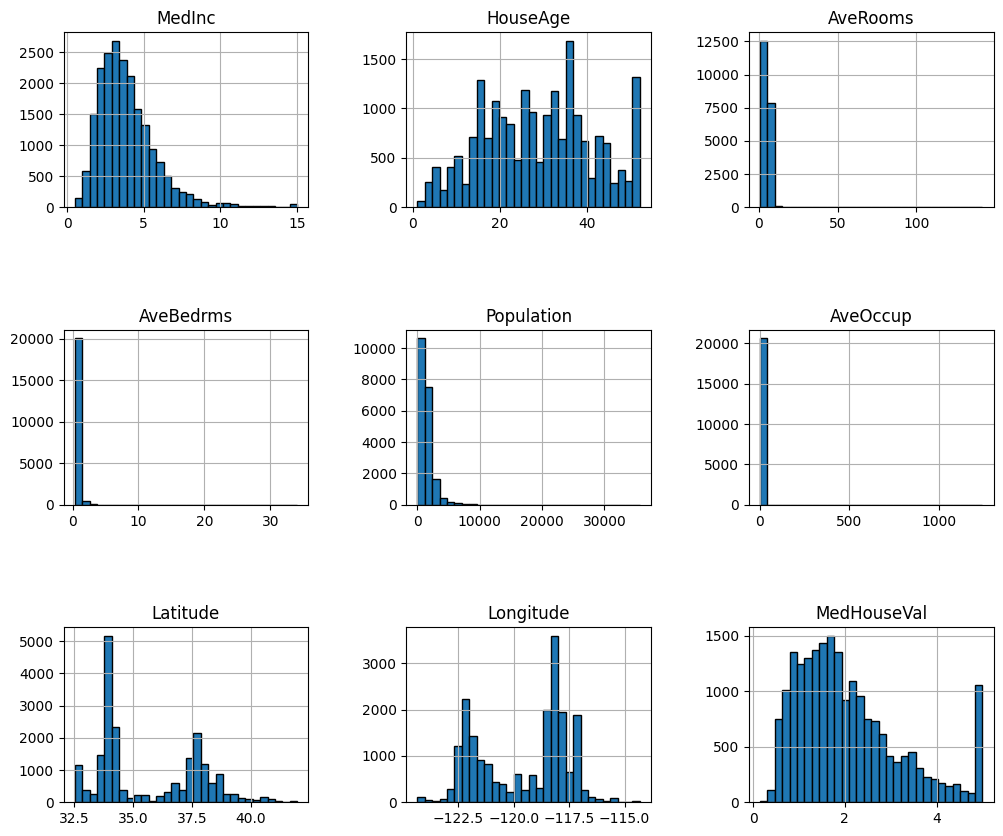

In [ ]:
# looking at the distribution of these features by plotting their histograms
dataset.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
# statistical measures of the dataset
dataset.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset

In [ ]:
correlation = dataset.frame.corr()

<Axes: >

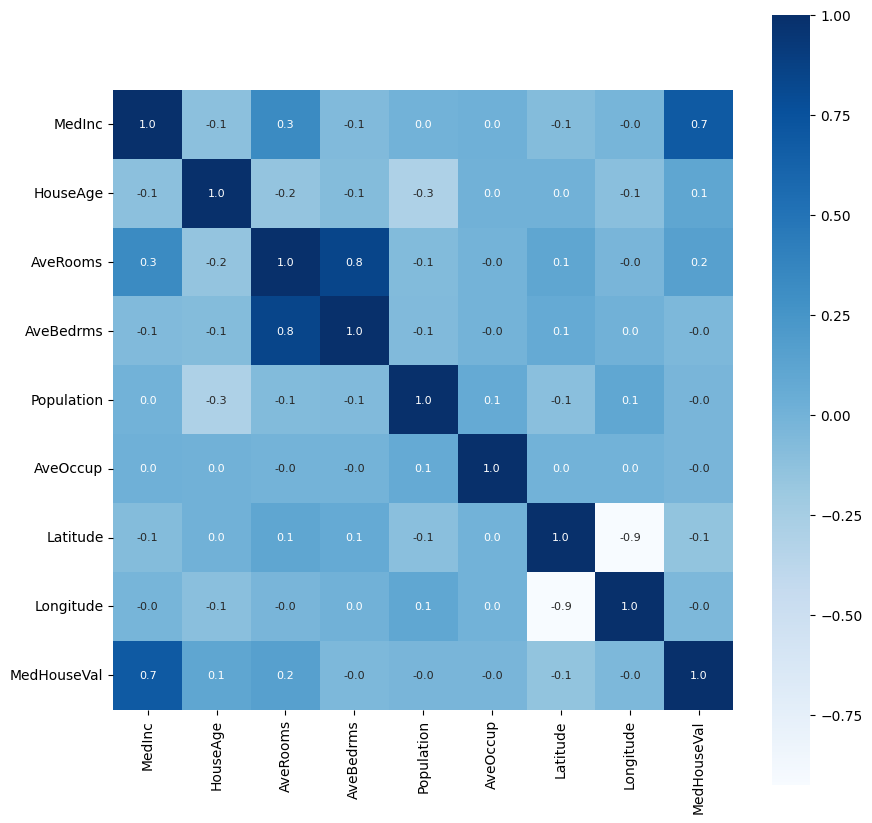

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### **4. Data Preprocessing**

In [ ]:
X = dataset.frame.drop(columns=['MedHouseVal'],axis=1)
Y = dataset.target

In [ ]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
print(X)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


### **5. Model Training**

Splitting the data into Training data and Test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model training

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### **6. Model Evaluation**

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

score_1 = r2_score(Y_train,training_data_prediction)

score_2 = mean_absolute_error(Y_train,training_data_prediction)

print('r2 score :',score_1)
print('mean absolute error :',score_2)

r2 score : 0.943650140819218
mean absolute error : 0.1933648700612105


In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

score_1 = r2_score(Y_test,test_data_prediction)

score_2 = mean_absolute_error(Y_test,test_data_prediction)

print('r2 score :',score_1)
print('mean absolute error : ',score_2)

r2 score : 0.8338000331788725
mean absolute error :  0.3108631800268186


### **7. Predictive system**

In [ ]:
def predict(input_data):
  input_data = np.asarray(input_data)
  input_data = input_data.reshape(1,-1)
  input_data = scaler.transform(input_data)
  price_predicted = model.predict(input_data)

  print('the price of the house is ',round(price_predicted[0]*100000,2),' $')

In [ ]:
input_data = dataset.frame.iloc[150,:-1]

In [ ]:
predict(input_data)

the price of the house is  277073.96  $


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
